<a href="https://colab.research.google.com/github/EsterCim/MERW-on-networks/blob/main/MERW_ER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MERW stationary probability distribution on ER-graphs**

Codice per generare un ER (N,p) graph, with N number of nodes and p probability of connecting a couple of nodes. Each graph generated will be an instance of the many different possible realizations. Nell'ensemble (N,p) ci sono grafi con diversi number of links K, e la probabilità per un grafo con K links di comparire nell'ensemble dipende da p, N e k.  

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


seed_value = 42
G = nx.erdos_renyi_graph(20, 0.49, seed=seed_value)


In [ ]:

num_links = G.number_of_edges()
print(f"Il grafico G ha {num_links} link.")

Il grafico G ha 98 link.


In [ ]:
nx.is_connected(G)

True

# Calcolo di MERW per 3 ER graphs: con frazione di links rimossi q=0, q=0.1, q=0.01

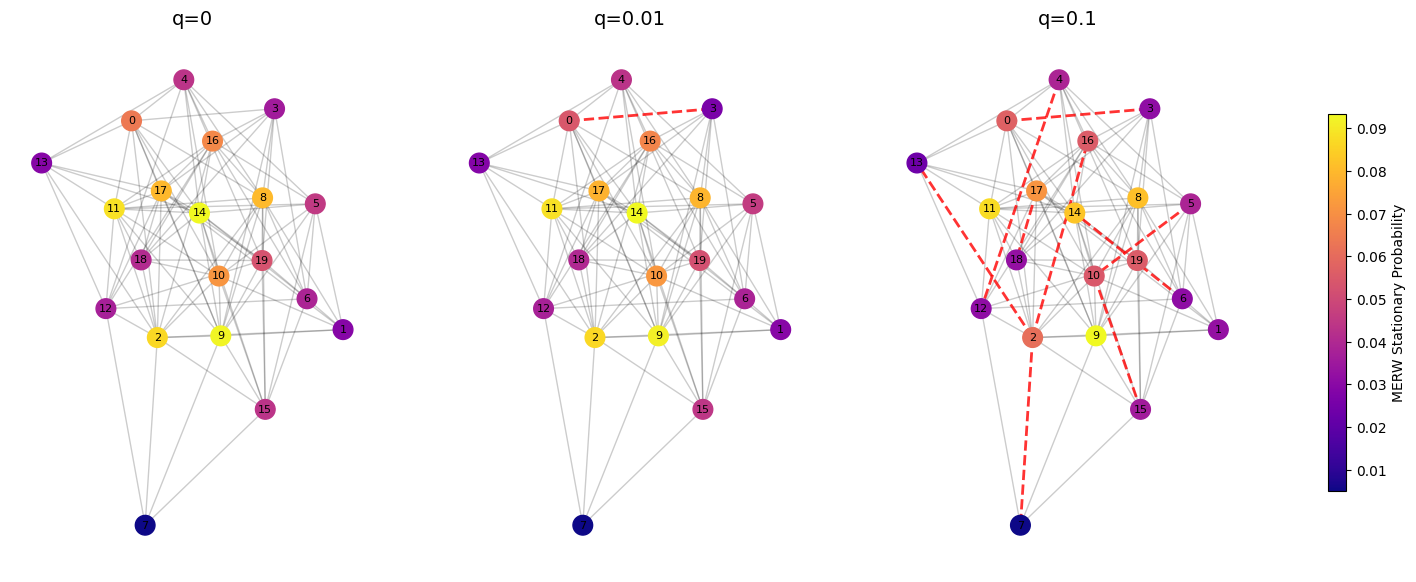

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.sparse.linalg import eigsh


qs = [0, 0.01, 0.1]
titles = ["q=0", "q=0.01", "q=0.1"]
seed_removal = 13

fig, axes = plt.subplots(1, 3, figsize=(20,7))


pos = nx.spring_layout(G, seed=42)

for ax, q_val, title in zip(axes, qs, titles):
    Gq = G.copy()


    if q_val == 0:
        edges_removed = []
    else:
        m = G.number_of_edges()
        remove_num = max(1, int(q_val * m))
        edges = list(G.edges())
        rng = np.random.default_rng(seed_removal)
        rng.shuffle(edges)
        edges_removed = edges[:remove_num]
        Gq.remove_edges_from(edges_removed)

        if not nx.is_connected(Gq):
            largest_cc = max(nx.connected_components(Gq), key=len)
            Gq = Gq.subgraph(largest_cc).copy()


    Aq = nx.to_scipy_sparse_array(Gq, format='csr', dtype=float)
    w, v = eigsh(Aq, k=1, which='LA')
    psi = np.real(v[:,0])
    if np.sum(psi < 0) > np.sum(psi > 0):
        psi = -psi
    psi = psi / np.linalg.norm(psi)
    pi_merw_q = psi**2
    pi_merw_q = pi_merw_q / pi_merw_q.sum()


    nx.draw_networkx_edges(Gq, pos, alpha=0.2, ax=ax)


    if edges_removed:
        nx.draw_networkx_edges(G, pos, edgelist=edges_removed, edge_color='red',
                               style='dashed', width=2, alpha=0.8, ax=ax)


    nodes = nx.draw_networkx_nodes(Gq, pos, node_color=pi_merw_q,
                                   cmap=plt.cm.plasma, node_size=200, ax=ax)


    nx.draw_networkx_labels(Gq, pos, labels={n:str(n) for n in Gq.nodes()},
                            font_size=8, font_color='black', ax=ax)

    ax.set_title(title, fontsize=14)
    ax.axis('off')


fig.colorbar(nodes, ax=axes.ravel(), label="MERW Stationary Probability", shrink=0.7)
plt.show()


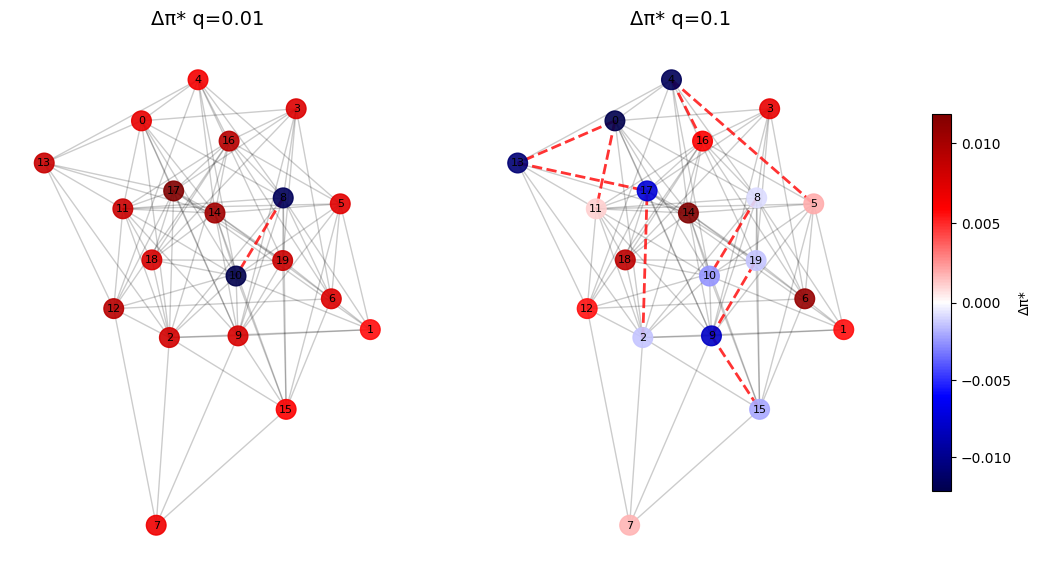

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import networkx as nx

fig, axes = plt.subplots(1, 2, figsize=(14,7))
cmap = plt.cm.seismic


for ax, Gq, edges_removed, pi_merw_q, title in zip(
        axes, Gq_list[1:], edges_removed_list[1:], pi_merw_list[1:], titles[1:]):


    common_nodes = list(set(G.nodes()).intersection(Gq.nodes()))
    pi_before = np.array([pi_merw_list[0][list(G.nodes()).index(n)] for n in common_nodes])
    pi_after = np.array([pi_merw_q[list(Gq.nodes()).index(n)] for n in common_nodes])
    delta_pi = pi_after - pi_before
    delta_dict = {n: d for n, d in zip(common_nodes, delta_pi)}
    node_colors = [delta_dict[n] for n in Gq.nodes()]


    norm = mcolors.TwoSlopeNorm(vmin=min(delta_pi), vcenter=0, vmax=max(delta_pi))


    nx.draw_networkx_edges(Gq, pos, alpha=0.2, ax=ax)


    nx.draw_networkx_edges(G, pos, edgelist=edges_removed, edge_color='red',
                           style='dashed', width=2, alpha=0.8, ax=ax)


    nodes = nx.draw_networkx_nodes(Gq, pos, node_color=node_colors,
                                   cmap=cmap, node_size=200, alpha=0.9, ax=ax)


    nx.draw_networkx_labels(Gq, pos, labels={n:str(n) for n in Gq.nodes()},
                            font_size=8, font_color='black', ax=ax)

    ax.set_title(f"Δπ* {title}", fontsize=14)
    ax.axis('off')


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes.ravel(), label="Δπ*", shrink=0.7)
plt.show()


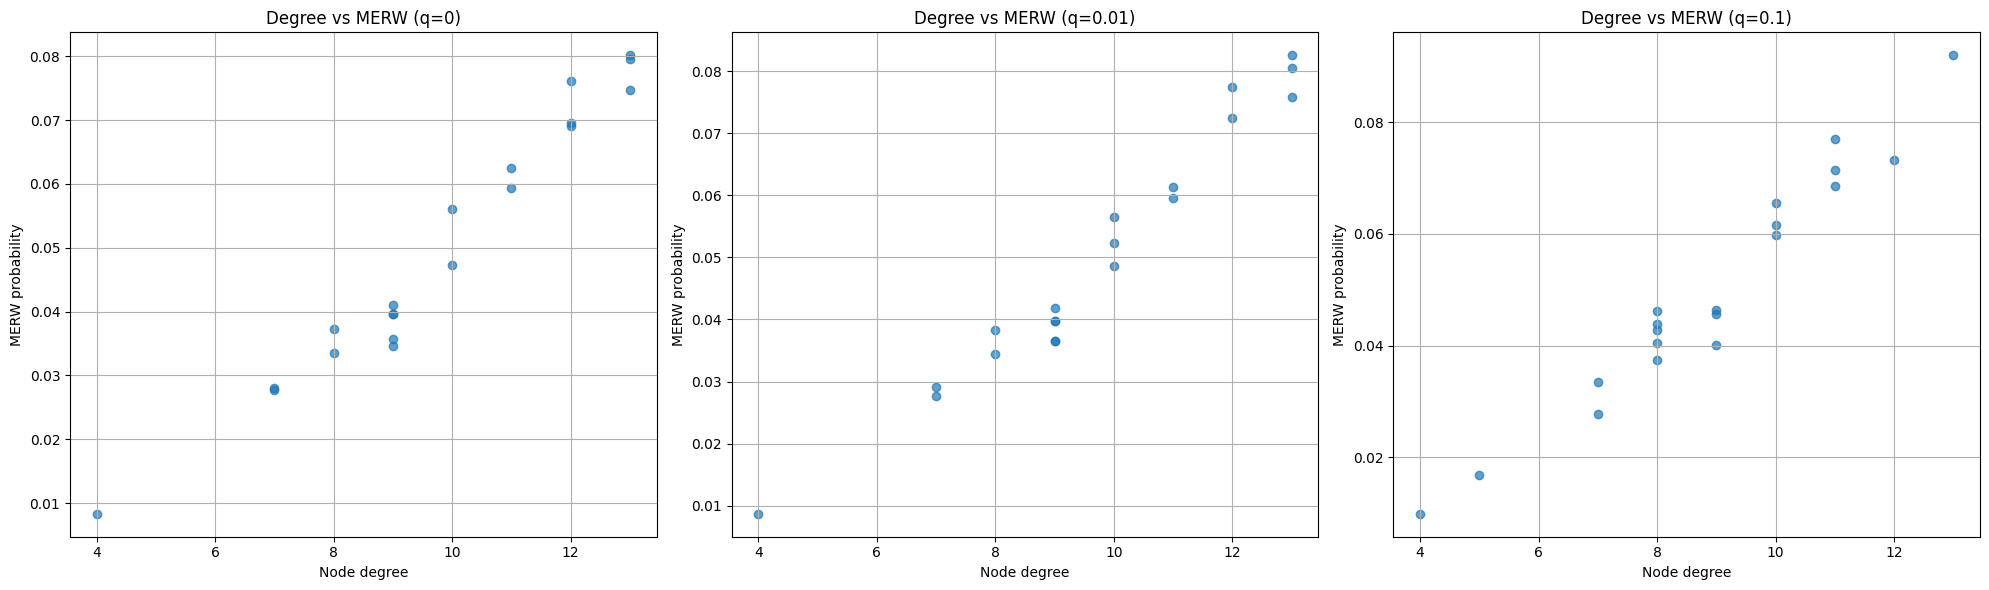

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

qs = [0, 0.01, 0.1]
titles = ["q=0", "q=0.01", "q=0.1"]

fig, axes = plt.subplots(1, 3, figsize=(20,6))

for ax, Gq, pi_merw_q, title in zip(axes, Gq_list, pi_merw_list, titles):
    degrees = np.array([Gq.degree(n) for n in Gq.nodes()])
    merw_probs = np.array(pi_merw_q)

    ax.scatter(degrees, merw_probs, alpha=0.7)
    ax.set_xlabel("Node degree")
    ax.set_ylabel("MERW probability")
    ax.set_title(f"Degree vs MERW ({title})")
    ax.grid(True)

plt.tight_layout()
plt.show()
